In [4]:
from azure_utils import KeyVault, DataLake
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
vault = KeyVault(keyVaultName = "keyvaultdva2022")
storage_credential = vault.get_secret(secretName = "storagePrimaryKey")

In [6]:
# Connect to storage:
storage = DataLake(account_name = "storageaccountdva", credential = storage_credential)

In [7]:
filepath = "C:/Users/phuon/Documents/Projects/Exoplanet/exonet_inputs/exonet_inputs/train_centroids.tar/train_centroids/train/"

In [8]:
local_v = "kplr_012935144_01_local_cen_w.npy"
global_v = "kplr_012935144_01_global_cen_w.npy"

In [9]:
def plot_lightcurve(filepath, name):
    data = np.load(filepath+name)
    plt.plot(data)

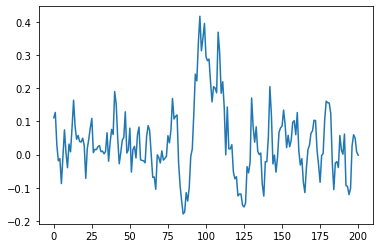

In [10]:
plot_lightcurve(filepath=filepath, name=local_v)

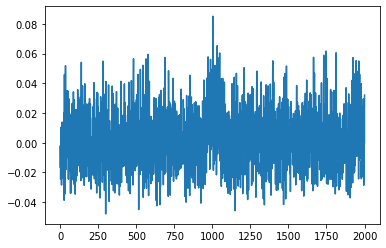

In [11]:
plot_lightcurve(filepath=filepath, name=global_v)

In [12]:
# Write to storage:
# storage.write(file_system = "test", directory = "test", file=df, file_name = "test.csv", extension="csv", overwrite = True)